Notre service de contre-espionnage a intercepté un message codé en fréquences. 

Notre service de contre-espionnage a commencé un programme de décodage, mais n'a pas pu le mener à bout.

Selon notre expert, le message contient un code à 4 chiffres. Chaque chiffre est codé par une modulation d'amplitude de 4 fréquences. 

Les basses fréquences représentent le bits de poids fort, et les hautes fréquences les bits de poids faible. Un chiffre est donc reconstitué par une formule

$C=A0*8 + A1*4 + A2*2 + A3$.

Quel est le chiffre ?

Le programme est ci-dessous, mais l'expert a été liquidé avant de pouvoir finir son programme de décryptage. Notre service peut constater que les amplitudes décodées sont trop irrégulière pour pouvoir déchiffrer le message. Que faire ?

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

32768 8192
[501 510 520 530]
[793.73725554 794.77068088 794.57748091 882.97720242]
[501 510 520 530]
[793.72699217 883.08120633 794.79046386 882.97902582]
[501 511 520 530]
[881.92826751 882.86089827 794.61390164 881.94332843]
[501 510 520 530]
[793.73906603 794.77028346 882.86207897 882.97719696]


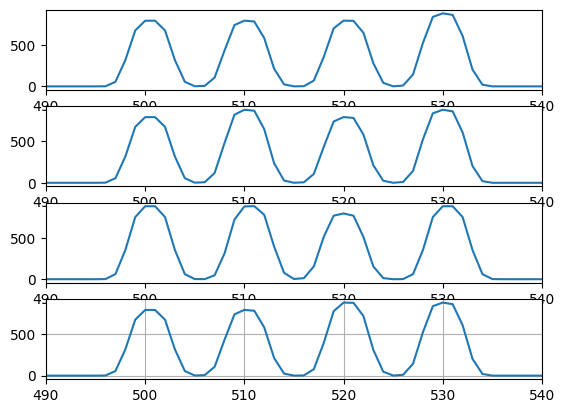

In [2]:
with open('supercoded.npy', 'rb') as f:
    code = np.load(f)
    
# Les 4 chiffres se suivent et sont de même longueur
N=len(code)
P=N//4
print(N,P)
codeRange=np.arange(P)

fig, ax=plt.subplots(4)

for i in range(4):
    oneCode=code[codeRange+i*P]

    # Il faut trouver une fenêtre qui favorise la reconnaissance de l'amplitude.
    # Flattop semble approprié...
    w = sp.signal.windows.flattop(P)
    oneCode*=w 

    fftOneCode = np.abs(np.fft.fft(oneCode))
    peaks,_=sp.signal.find_peaks(fftOneCode, height=700)
    peaks=peaks[0:4]
    print(peaks)
    vPeak=fftOneCode[peaks]
    print(vPeak)
    ax[i].plot(fftOneCode)
    ax[i].set_xlim([490, 540])
plt.grid()
plt.show()





## Generateur de code

Pour info, le code a été généré par le script suivant. Afin de pimenter l'affaire, les fréquences ont été trafiquées autour des valeurs entières de fréquence. Ceci a pour effet de truquer l'amplitude. Si vous générez un code en définissant le tableau f avec les valeur [0, 10, 20, 30], le décodage sera plus facile.

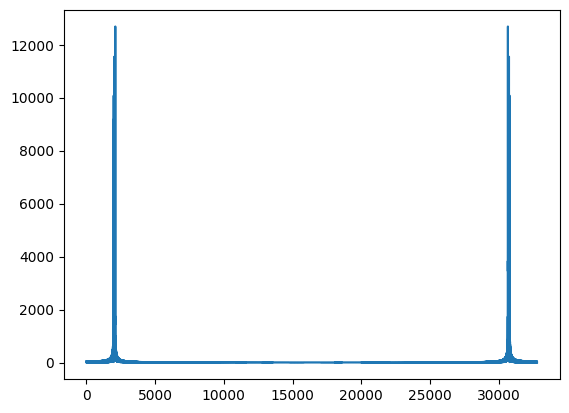

In [35]:
# Generateur de code
P=8192
DA=0.1
A=0.9
fe=8000
DF=fe/P

f=np.array([0.5,10.2,20.4,30.1])*DF+DF*500
a=np.array([0,0,0,1])*DA+A

def encode(f,a):
    s=np.zeros(P)
    t=np.arange(P)/fe
    for i in range(len(f)):
        s += a[i]*np.sin(2*np.pi*f[i]*t)
    return s

ss=[]
ss.append(encode(f,a))

f=np.array([0.5,10.2,20.2,30.1])*DF+DF*500
a=np.array([0,1,0,1])*DA+A
ss.append(encode(f,a))

f=np.array([0.5,10.6,20.0,30.5])*DF+DF*500
a=np.array([1,1,0,1])*DA+A
ss.append(encode(f,a))

f=np.array([0.5,10.2,20.4,30.1])*DF+DF*500
a=np.array([0,0,1,1])*DA+A
ss.append(encode(f,a))

s=np.concatenate(ss)
with open('supercoded.npy', 'wb') as f:
    np.save(f, s)

ffts=np.abs(np.fft.fft(s))
plt.plot(ffts)   
#plt.xlim([400,600])